### Problem Statement:
Census Income Project
Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 
#### The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

To download the dataset, use the link given below. 
Download Files: https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [83]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [84]:
#DataSet Information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The data seem to have 9 object/ categorical columns which are :
 - Workclass
 - Education
 - Marital_status
 - Occupation
 - Relationship
 - Race
 - Sex
 - Native_country
 - Income

while 6 columns have numerical/ integer data.
- It has 32560 rows and 15 columns.
- Target column is the "Income" column

In [85]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null data is found in the dataset. We can check this with a heat map too for a good visualization and understanding.

<AxesSubplot:>

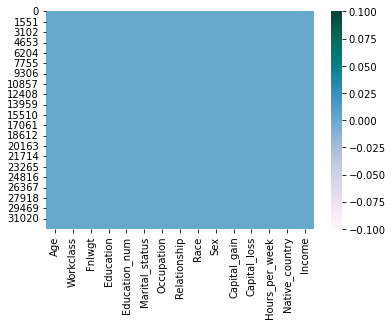

In [86]:
sns.heatmap(df.isnull(),cmap='PuBuGn')

Again,we can see that there is no null data in the dataset, so we dont have the need for the impuation technique.

In [87]:
df.shape

(32560, 15)

As we can see there are 32560 rows and 14 columns+ Target column ("Income").

In [88]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

- There are 15 columns which are mentioned above:
    - Age=Age of a  person.
    - Workclass=Type of work
    - Fnlwgt=Final weight
    - Education=level of education
    - Education_num= Total number of years in education
    - Marital_status= Marital status
    - Occupation=Occupation of people
    - Relationship=Relationship of the person
    - Race=Race/ethnicity
    - Sex=Genger of the person
    - Capital_gain=Gain/Profit
    - Captital_loss= Loss 
    - ours_per_week=Hours worked/week
    - Native_country=Country of residence
    - Income= Income of a person

In [89]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

It shows the number of unique elements present in each column.

In [90]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

##### The Income column we can use as a target with binary values.

### Checking the missing or double values in the object columns because sometimes the values are missing or redundantly repeated.

In [91]:
df["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [92]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [93]:
df["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

Education column has the levels of education mentioned from Preschool till Doctorate.

In [94]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

Marital status  has no missing category, and it mentions the above status

In [95]:
df["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [96]:
df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Occupation column has a missing category. 

In [97]:
df["Relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

Relationship column Has no missing category

In [98]:
df["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

Race column has no missing category too

In [99]:
df["Native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Native country column has a missing category.

In [100]:
df.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

- In Native_country (583),Occupation(1843), and Workclass (1836) columns, have "?" category== missing values. I have mentioned the number of missing values in bracket in front of each columns.
- We can replace these values with the mode.

In [101]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

## Data Visualization (EDA)

In [102]:
#Categorical columns
c_columns = [x for x in df.columns if df[x].dtypes=='O']
#Numerical columns
n_columns = [y for y in df.columns if df[y].dtypes!='O']

#### Univariate Analysis: We plot each columns seperately.

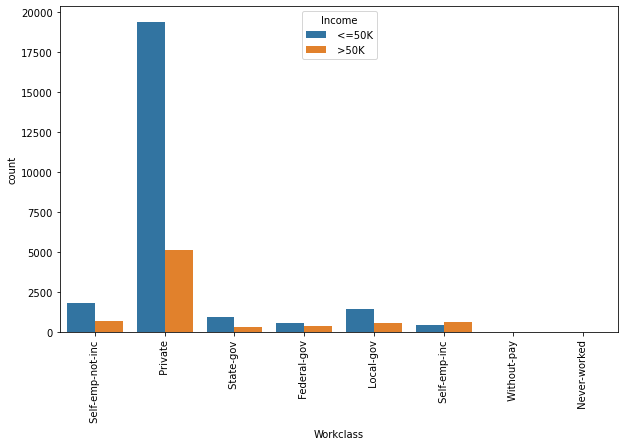

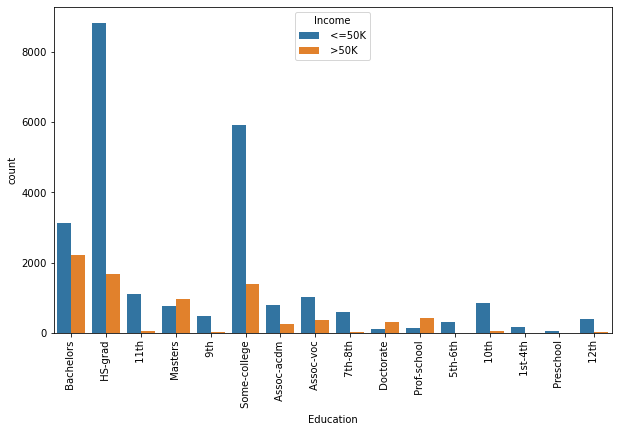

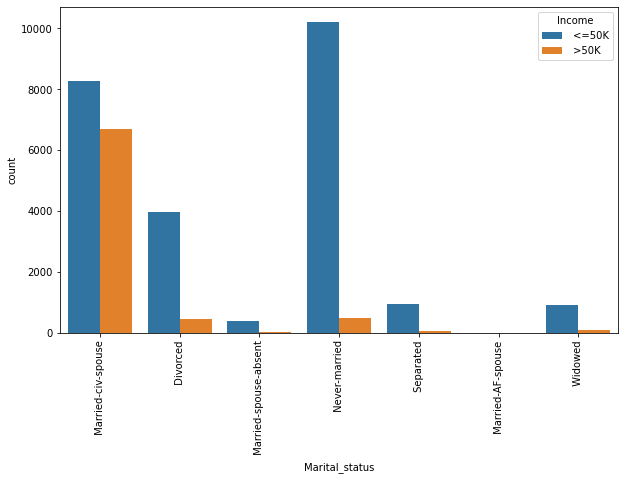

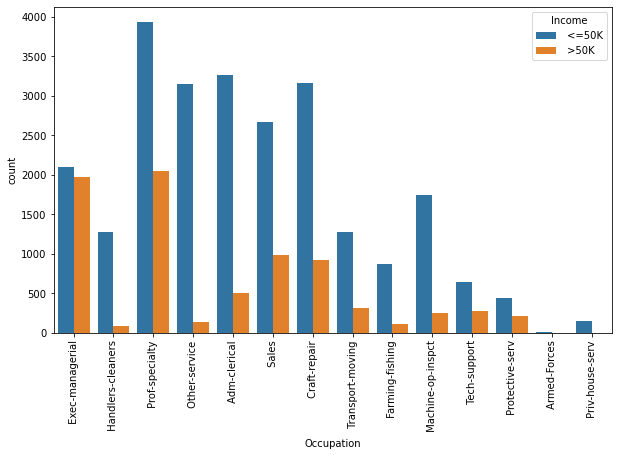

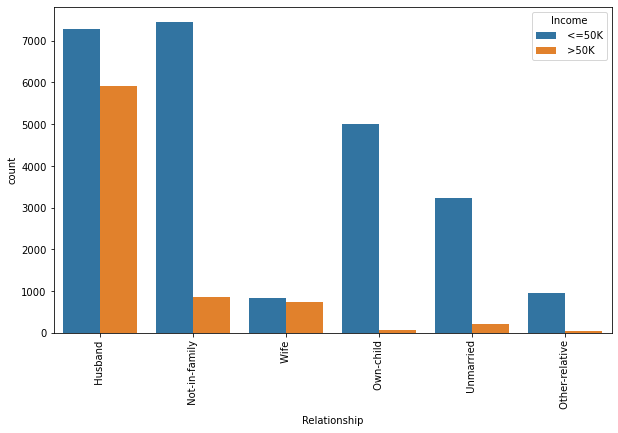

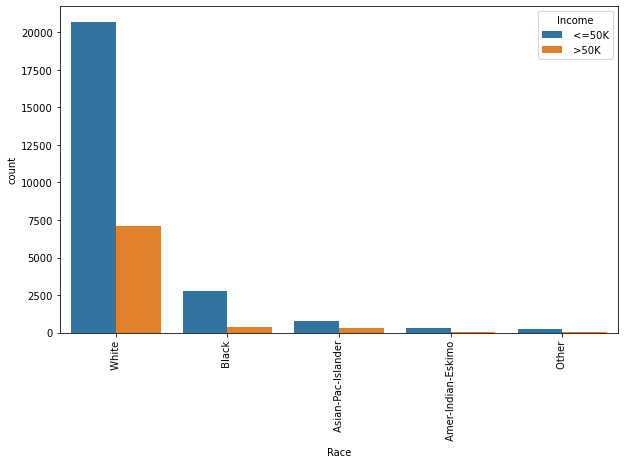

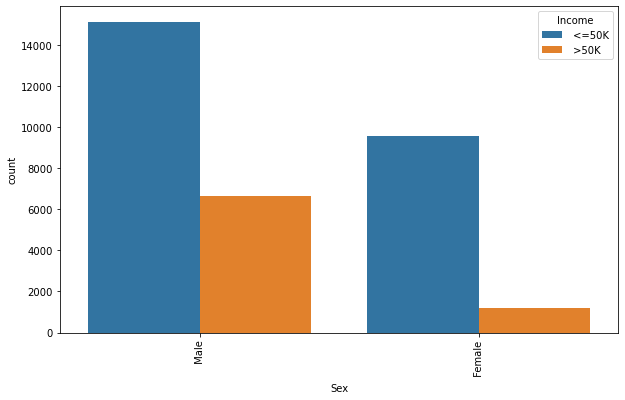

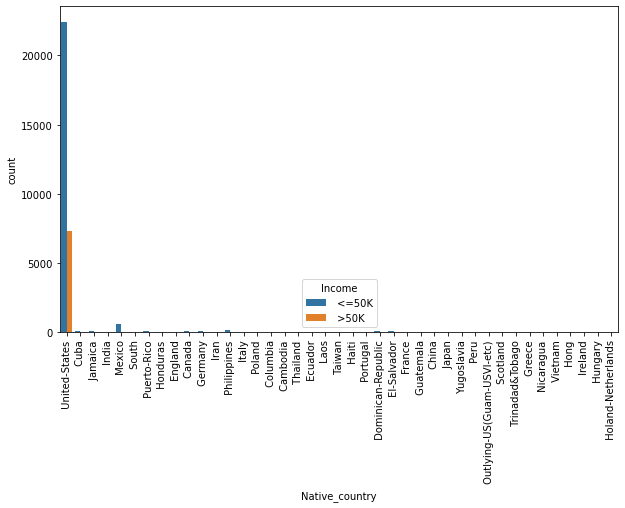

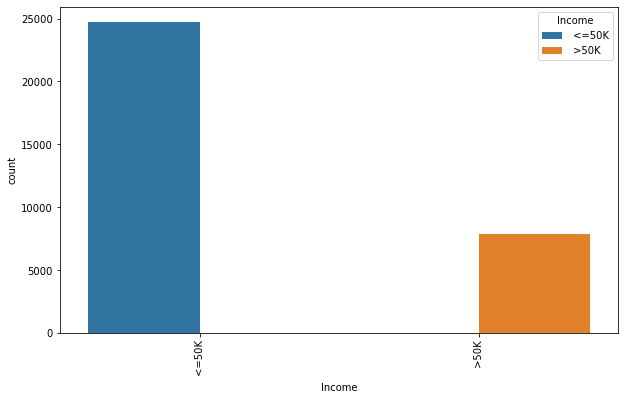

In [77]:
for i in df[c_columns]:
    plt.figure(figsize=(10,6))
    sns.countplot(df[i],hue='Income',data=df)
    plt.xticks(rotation=90)

Inference:
- Workclass:
    - Maximum people worked in the private sector and nearly 20000 earned less than or equal to 50K>, while around 5000 earned more than 50K.
    - Without pay and Never worked people were obviously nil or negligible.
- Education:
    - Around 9000 people had Higher Secondary education who earned less than 50K.Most people earning more than 50K have seem to completed their Bachelors degree.
    - Preschoolers seem to be earning less than 50K and their count was the least of all.
- MaritalStatus:
    - People who were never married were most in number in the range who earned less thann 50k, while who earned least in range of less than 50K were the people who were married and spouse was absent.
    - Married with spouse category people were more in count who earned more than 50k.
    - Married AF Spouse category had no earnings aparently, while those who were married-spouse absent and seperated were least in count whoe arned more than 50K.
- Occupation:
    - Prof_Speciality was the occupation whose count was high who earned less than 50K, while executive managerial were more in count who earned more than 50k. The executive managerial job seem to have been equal in count almost to earn less than 50K too, after the Prof speciality job.
    - The least were earned by and those who were least in count was the armed forces job category people.
    - Most people are married with a spose, while least have their spouse absent.
- Relationship:
    - Only husband and People with no family were most in count to earn  less than 50K.
    - Only husband also seem to be most in count to earn more than 50K
    - Least in count was wife who earned less than 50K, and other relative who earned more than 50K
- Race:
    - People who were White in race accounted most to earn both more than 50K and less than 50K
    - People of other race were least in count to earn 50K above and less than 50K.
- Sex:
    - Male were more in count in both the categories of earning i.e <=50K and >50K
- Native_country:
    - United States was the only country who had most count wheer people earned more than 50K and less than 50.
    - Mexico was the country which showed most number of people who earned less than 50K
- Income:
    - Around 25000 people seem to be earning less than 50k, while around 8000 people seem to earning more than 50K

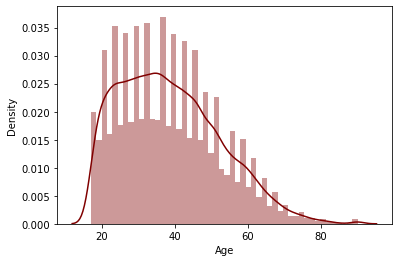

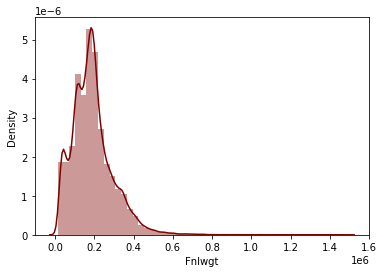

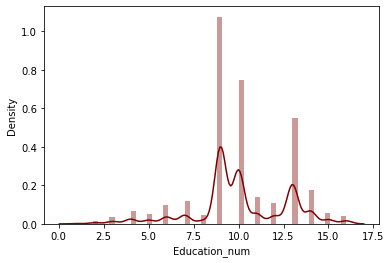

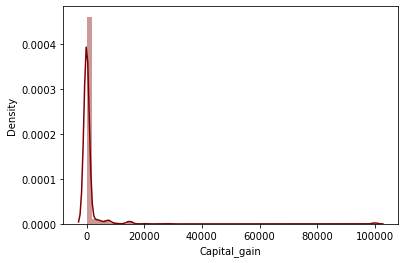

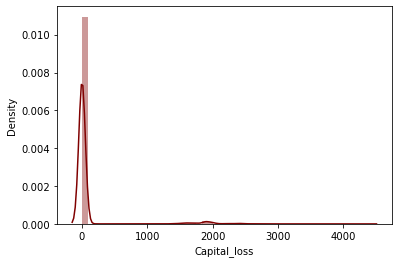

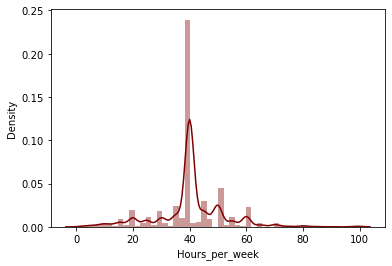

In [78]:
for i in df[n_columns]:
    plt.figure()
    sns.distplot(df[i],color='maroon')

Above data shows graphical representation of numerical columns in the given dataset.
- The columns age, Fnlwgt,Capital gain and capital loss shows right skewed graph.
- Hours_per_week and Education_num shows graph with nodes in it, while most people worked 40hrs per week.

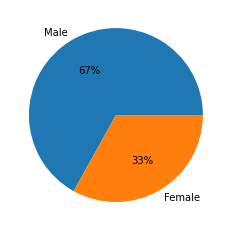

In [79]:
labels="Male","Female"
fig, pc = plt.subplots()
pc.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.0f%%')
plt.show()

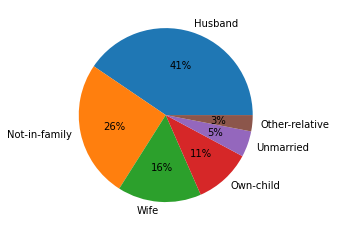

In [80]:
labels='Husband','Not-in-family', 'Wife', 'Own-child', 'Unmarried','Other-relative'
fig, pc = plt.subplots()
pc.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.0f%%')
plt.show()

<Figure size 1440x1440 with 0 Axes>

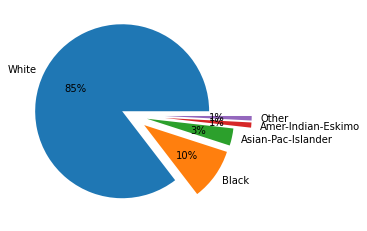

In [81]:
labels='White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'
plt.figure(figsize=(20,20))
fig, pc = plt.subplots()
explode = (0.1, 0.2, 0.2, 0.4,0.4)
pc.pie(df['Race'].value_counts(), labels=labels, autopct='%1.0f%%',explode=explode)
plt.show()

##### Bivariate Analysis

As the target columns is "Income" we can use the column to plot against other variables.

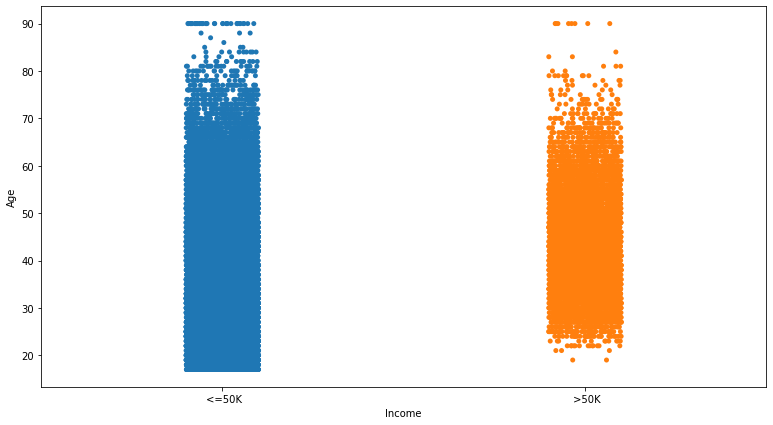

In [82]:
plt.figure(figsize=(13,7))
sns.stripplot(x = 'Income' , y ='Age' , data = df)
plt.show()

People between age group 25-65 seem to earn >50K, while those between age group 10-70 eaned <=50K mostly. The count of people decreses after reaching the max age in both the cases.

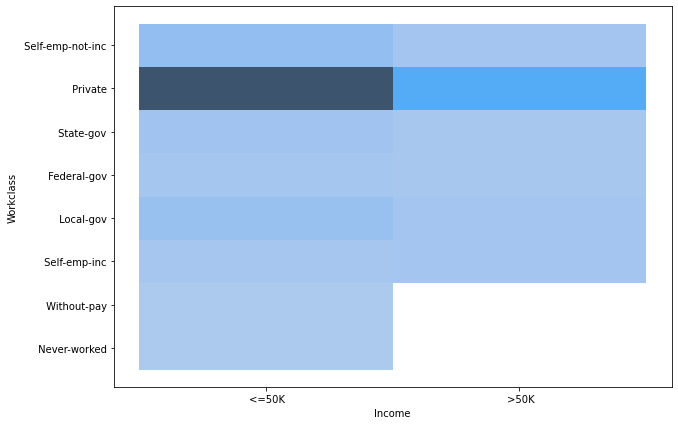

In [85]:
plt.figure(figsize=(10,7))
sns.histplot(x = 'Income' , y ='Workclass' , data = df)
plt.show()

Private sector working class people earned >50K. While other work class people seem to earn less than 50K

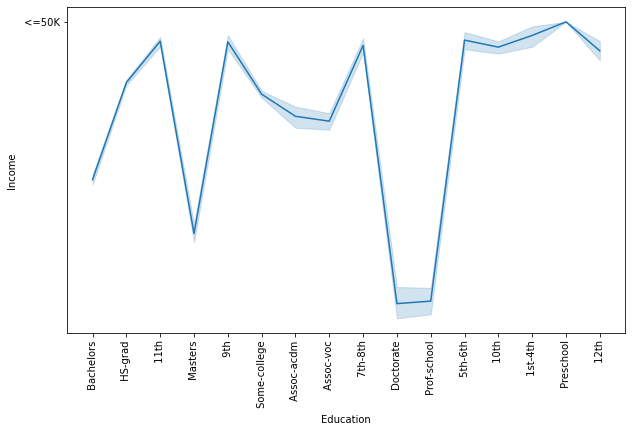

In [91]:
plt.figure(figsize=(10,6))
sns.lineplot(y = 'Income' , x ='Education' , data = df)
plt.xticks(rotation=90)
plt.show()

The income seems to be the maximum for the Doctorate and Prof-school educated people, while it was least for people who were HS grad,9th passed, 7-8th std,preschool educated people

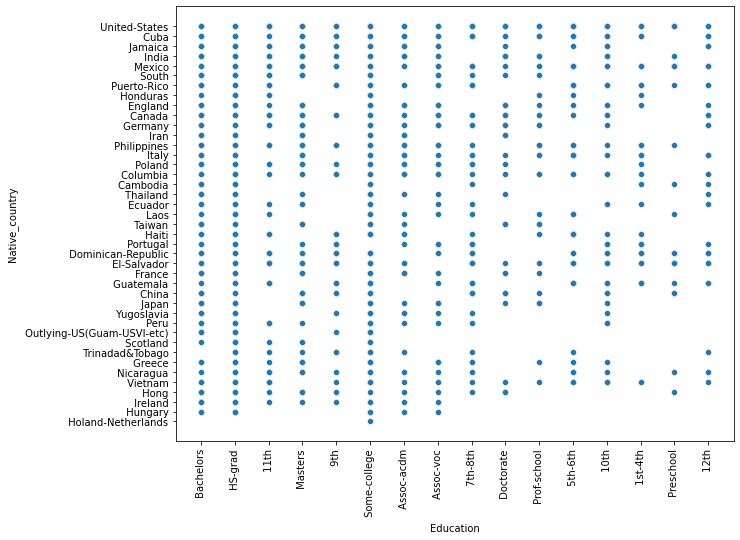

In [103]:
plt.figure(figsize=(10,8))
sns.scatterplot(y = 'Native_country' , x='Education', data = df)
plt.xticks(rotation=90)
plt.show()

- Holland and Netherlands have only College educated people,while Hungary seems to have HS grad and above educated people.
- Trinadad&Tobago have maximum educated as Masters, Scotland has maximum educated above bachelors. 
- The southern america countries seem to ahve less educated people than other countries in the dataset.

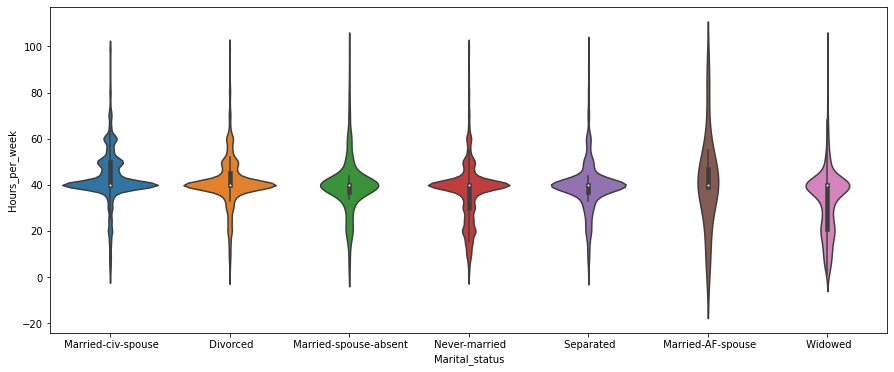

In [108]:
plt.figure(figsize=(15,6))
sns.violinplot(y = 'Hours_per_week' , x ='Marital_status' , data = df)
plt.show()

- Most people seem to be working fr 40hrs per week, although people married and with a spouse seems to be more in this category or working 40hrs/week.
- Least people were in the married AF-spouse category.

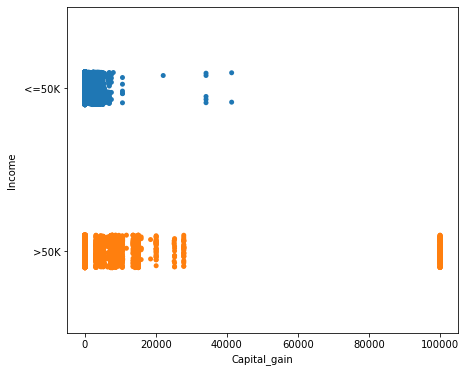

In [111]:
plt.figure(figsize=(7,6))
sns.stripplot(x = 'Capital_gain' , y ='Income' , data = df)
plt.show()

- Capital_gain of 30000, which reached 100000, was observed in the people whose income was more than 50K.
- Capital_gain for people earning less than or equal to 50K was around 10000 for most people.

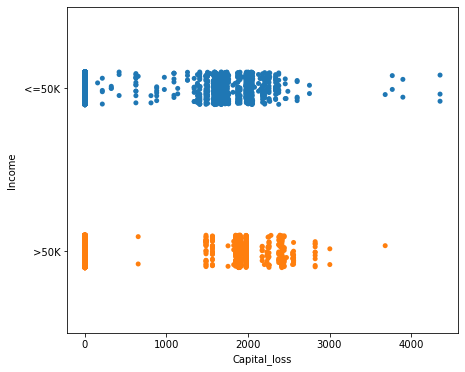

In [112]:
plt.figure(figsize=(7,6))
sns.stripplot(x = 'Capital_loss' , y ='Income' , data = df)
plt.show()

Capital _loss was observed more in the group of people who earned less than or equal to 50K

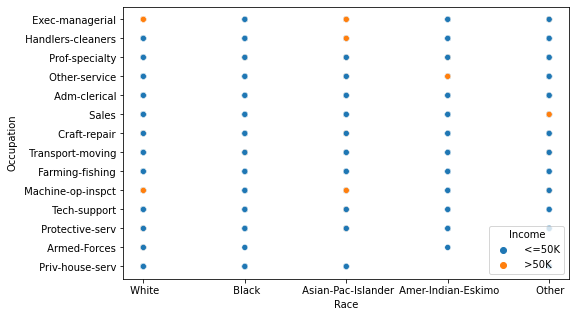

In [118]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Race' , y ='Occupation' , hue='Income',  data = df)
plt.show()

- Asian Pacific islander race seem to be earning more than 50K in the occupation group Machine Op inspector,Handlers-cleaners, and exec managerial roles.
- In the WHite race, again Machine op inspectors and Exec manegerial occupation were the earning more than 50K.
- In American_indian_eskimo race, Otherservices seem to be earning >50K
- while in other race,the occupation of sales seem to be having people earning more than 50K.
- The black race were earning <=50K in all occupations.

### Multivariate Analysis

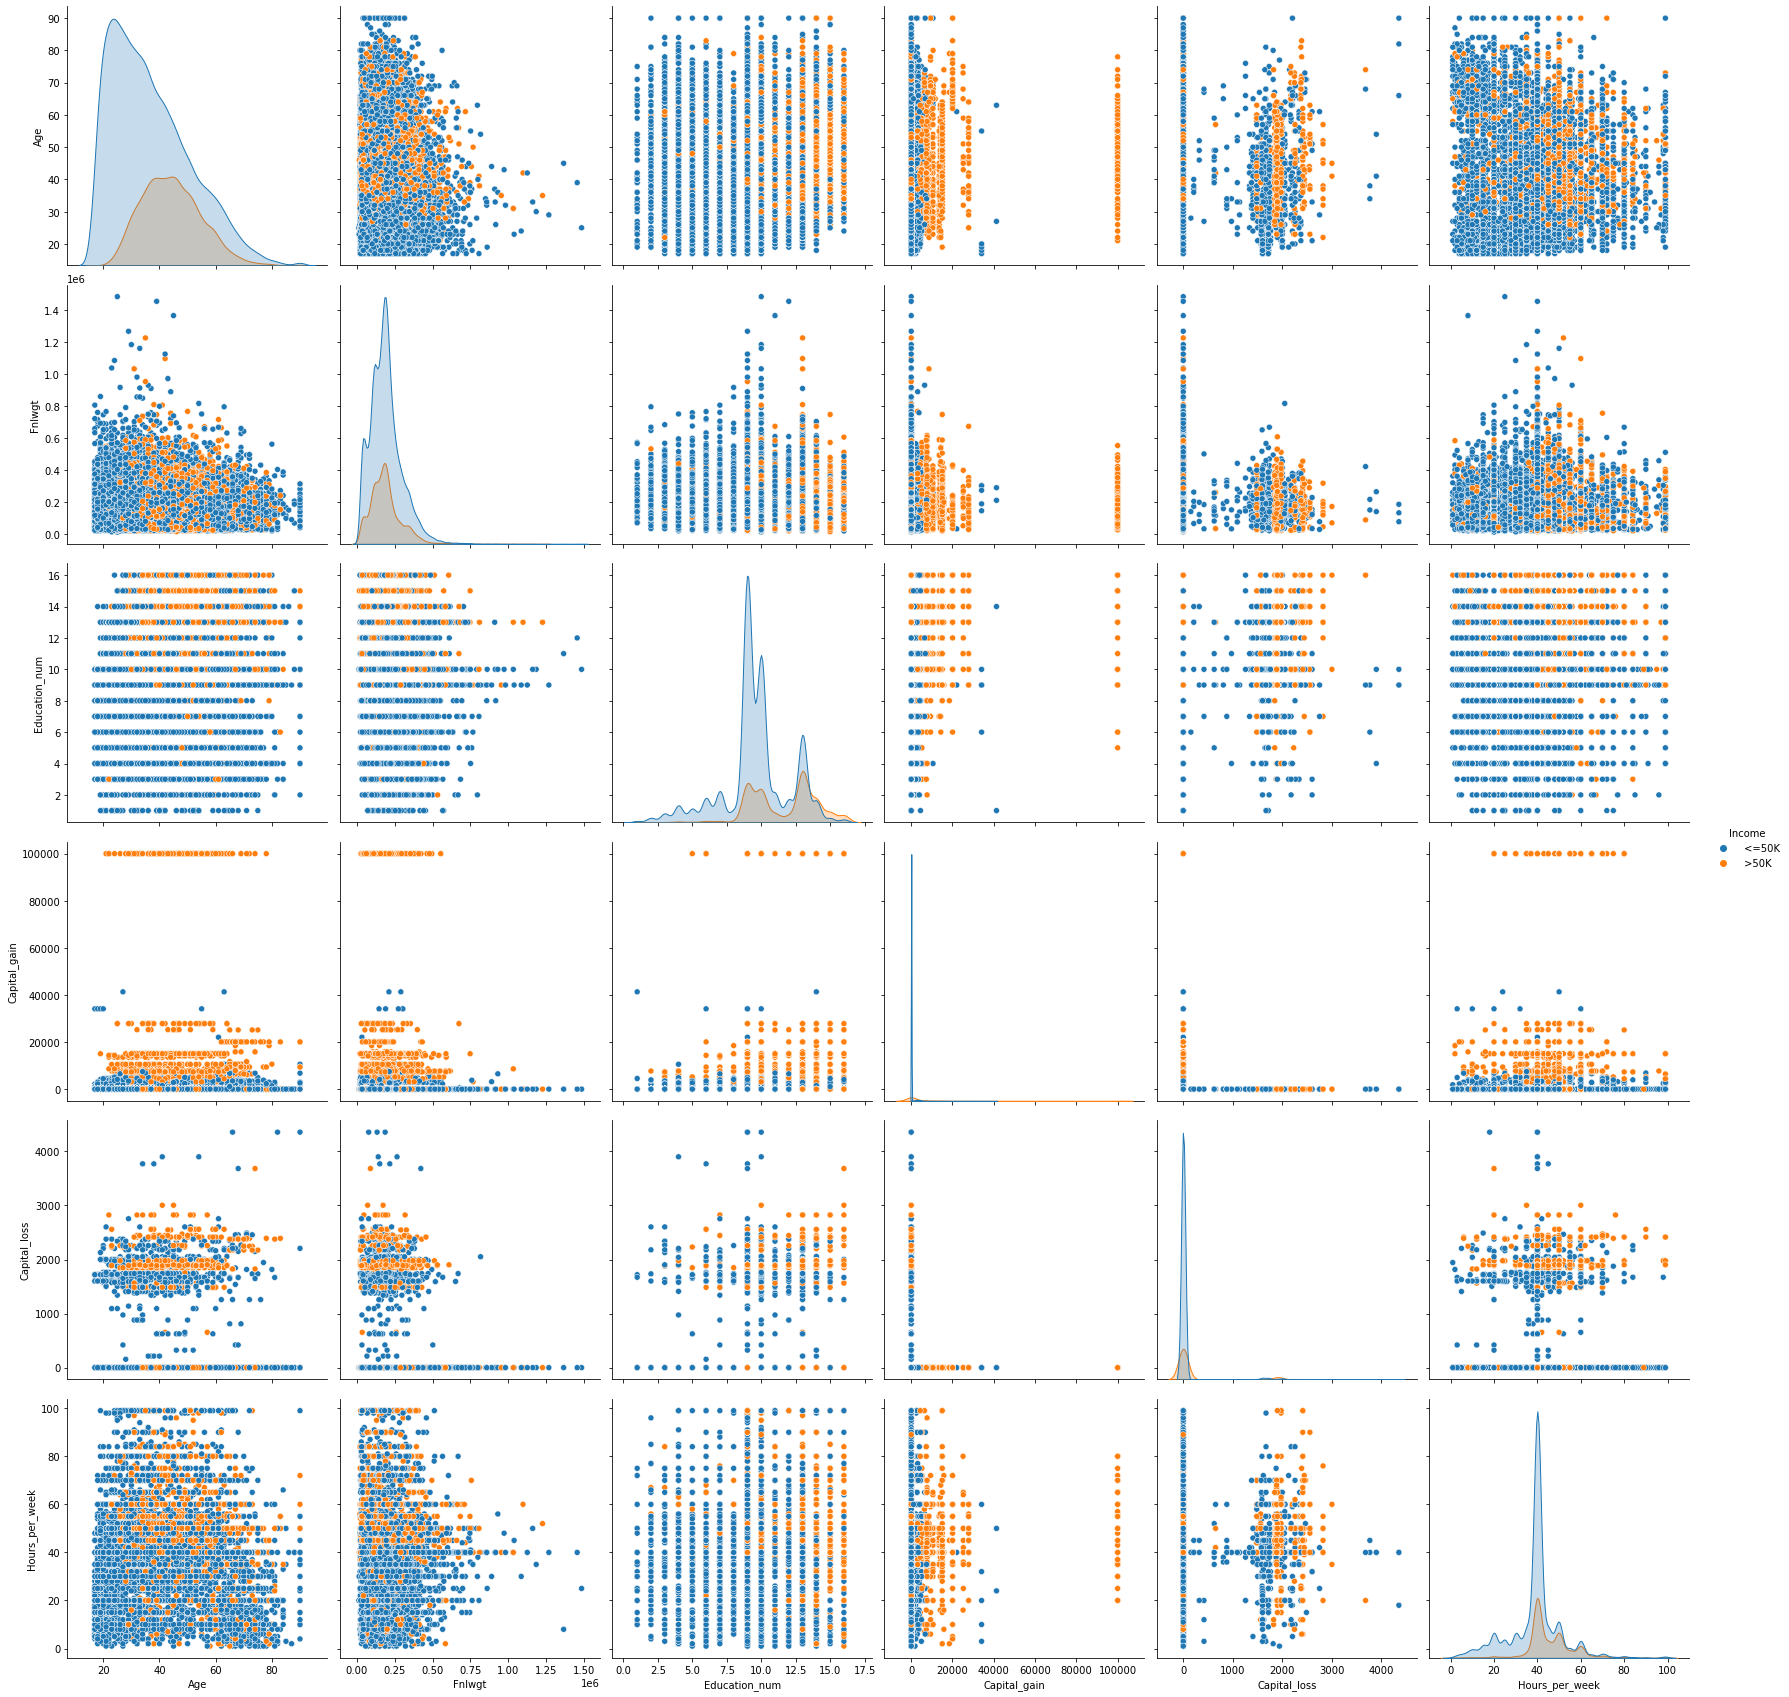

In [120]:
sns.pairplot(data=df,height=4,kind='scatter',hue='Income')

The plots show the relationship between all the columns with each other, keeping in consideration the target column('Income'). 

### Label Encoding:

#### In the dataset there are 9 categorical columns. We can encode these columns using Label Encoder.

In [103]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
l=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for val in l:
    df[val]=le.fit_transform(df[val].astype(str))

In [104]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


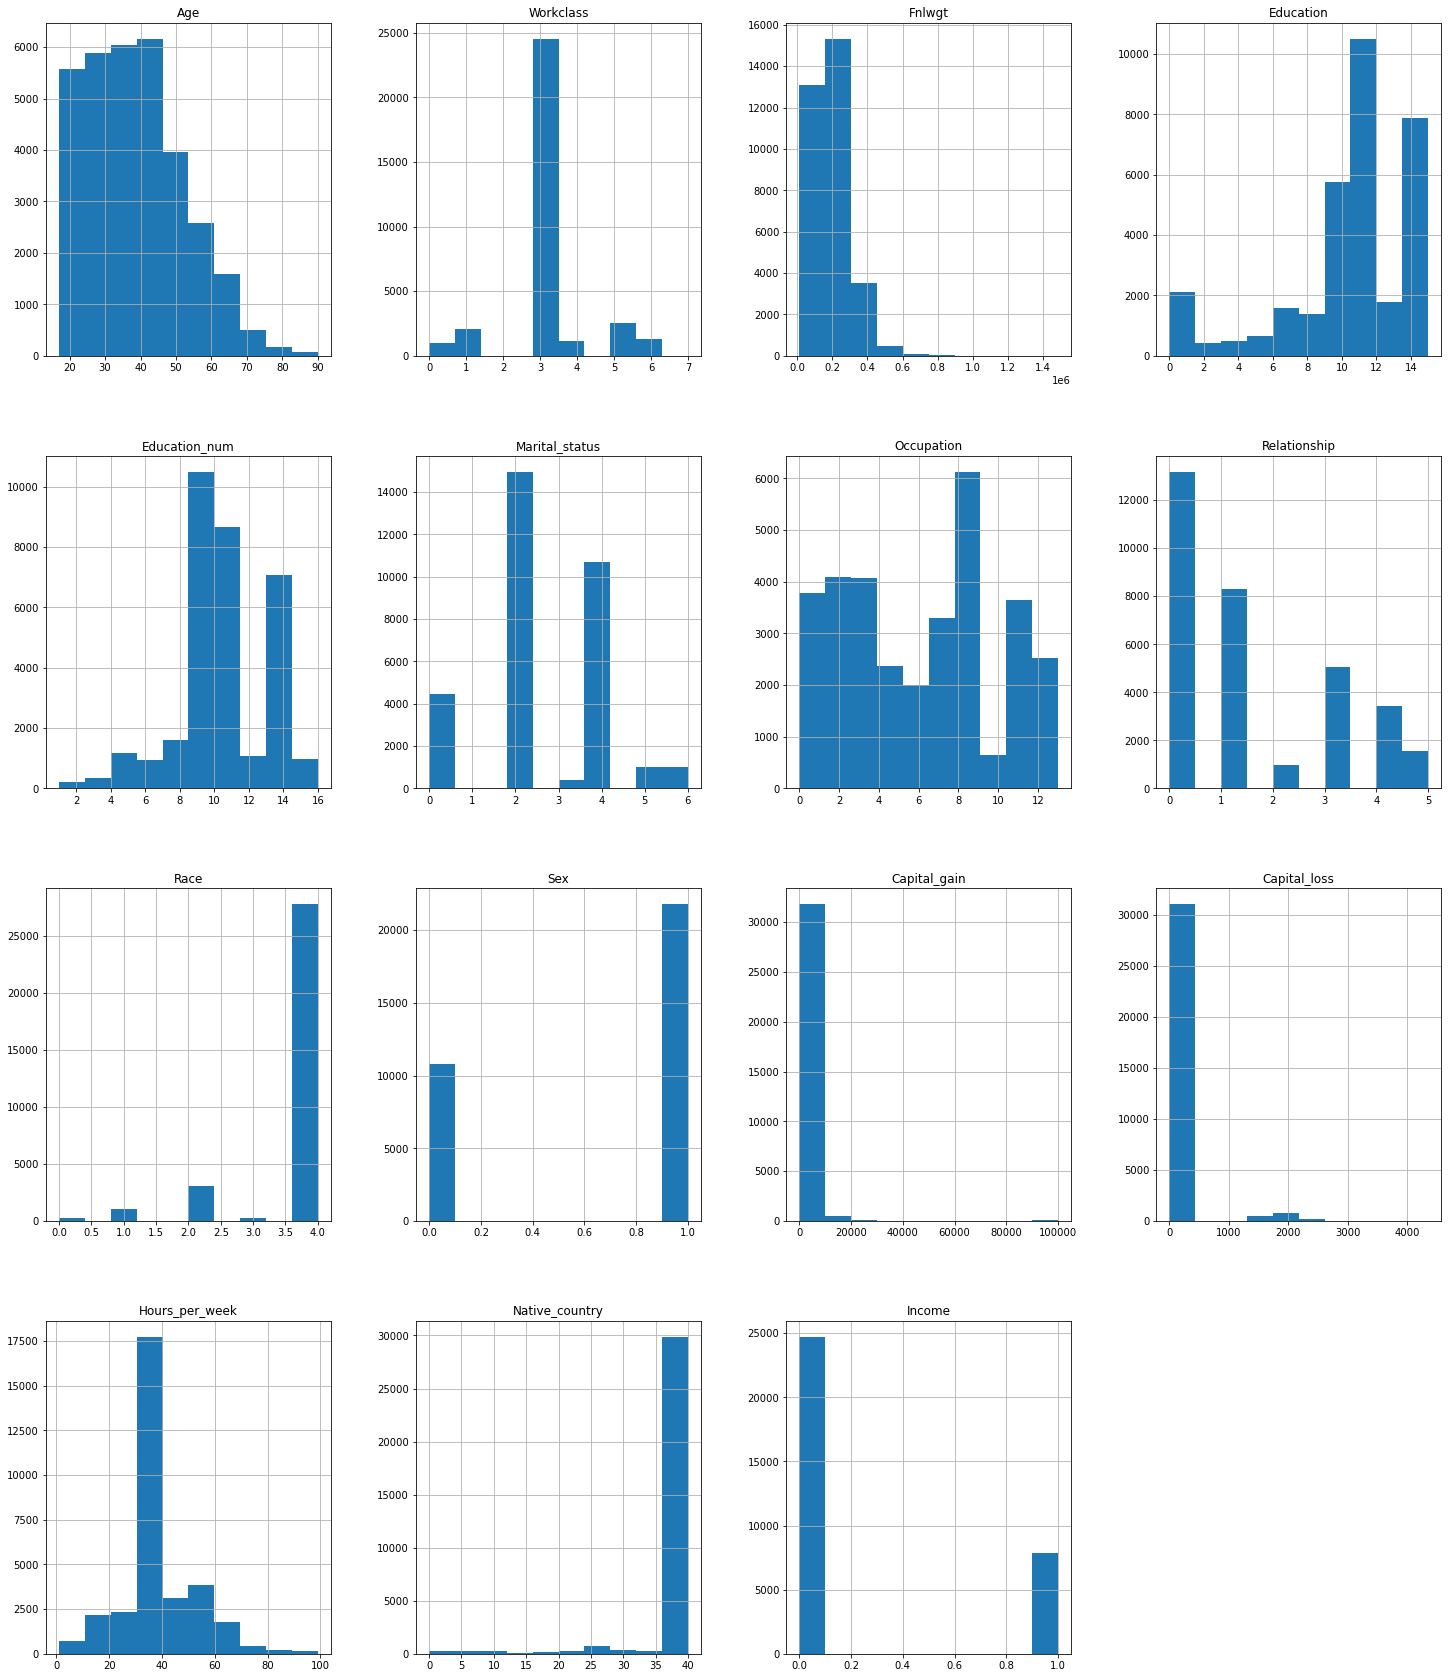

In [24]:
df.hist(figsize=(25,30))
plt.show()

The histograms shows all the columns in the dataset

In [25]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


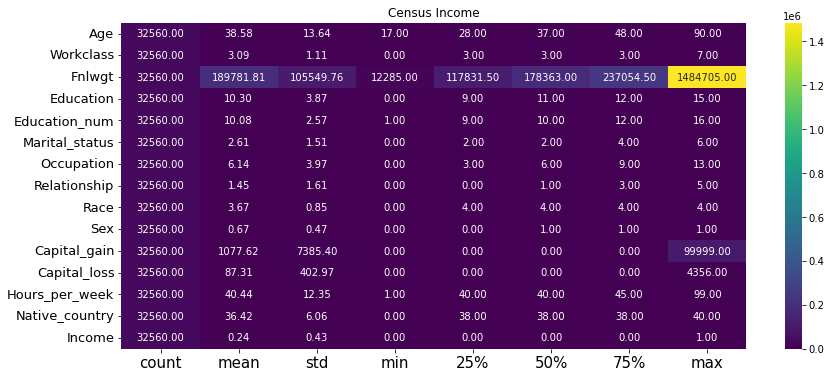

In [26]:
plt.figure(figsize=(14,6))
sns.heatmap(df.describe().transpose(),annot=True,fmt='0.2f',cmap='viridis')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Census Income")
plt.show()

In the above heatmap:
- The mean is > median in Capital_gain,Capital_loss, Fnlwgt-- which means that the distribution is right skewed.
- The standard deviation is very high in the Capital_gain, Capital_loss, Fnlwgt columns indicating that the data is highly spread. 
- The difference between the 75% percentile and max is huge in the columns Capital_gain, Capital_loss,Fnlwgt which means that outliers may be present.
- Rest of the data in the dataset shows normalcy.

### Check Correlation of columns with the target:

In [27]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


<AxesSubplot:>

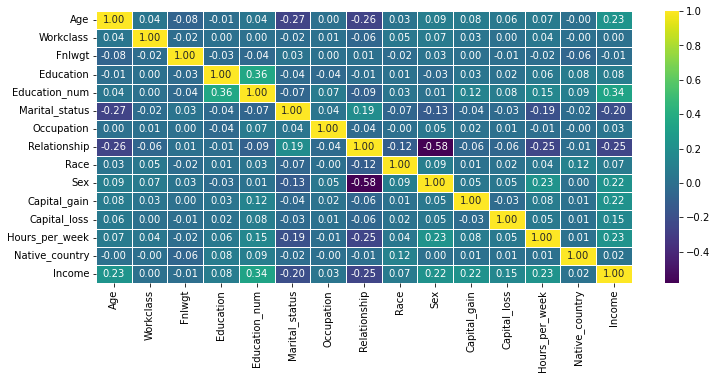

In [28]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),cmap='viridis',annot=True,linewidth=0.5,fmt='0.2f')

Our Target column is Income:

    - Negative correlation is seen with the Marital_status and Relationship column., with -0.20, and -0.25 values respectively.
    - Fnlwgt shows a very less negative correlation.
    - Education_num shows maximum positive correlation with the target column.
    - Rest all columns shows a positive correlation.

In [105]:
df.corr()['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Race              0.071853
Occupation        0.034599
Native_country    0.023063
Workclass         0.002739
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

The above values show the correlation with the target column in a descending order.

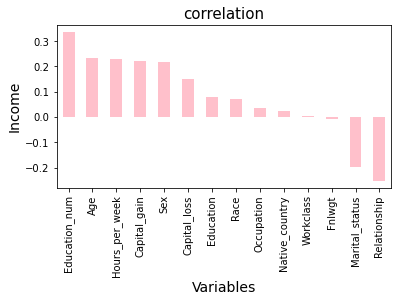

In [107]:
plt.figure(figsize=(6,3))
df.corr()["Income"].sort_values(ascending=False).drop(["Income"]).plot(kind='bar', color='pink')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("Income",fontsize=14)
plt.title("correlation",fontsize=15)
plt.show()

- Negative correlation is seen with the Marital_status and Relationship column., with -0.20, and -0.25 values respectively. Hence we can consider dropping those columns.
- Maximum positive relation is with the column Education_num, followed by Age, Hours_per_week,Capital_gain,Sex, Capital_loss,Education, Race, Occupation and  Native_country.


In [108]:
df.drop(['Relationship','Marital_status'],axis=1, inplace=True)

## Checking Outliers

Age                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
Workclass         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Fnlwgt             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Education         AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Education_num     AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Occupation           AxesSubplot(0.125,0.391471;0.133621x0.222059)
Race              AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Sex                AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Capital_gain      AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Capital_loss      AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Hours_per_week          AxesSubplot(0.125,0.125;0.133621x0.222059)
Native_country       AxesSubplot(0.285345,0.125;0.133621x0.222059)
Income                AxesSubplot(0.44569,0.125;0.133621x0.222059)
dtype: object

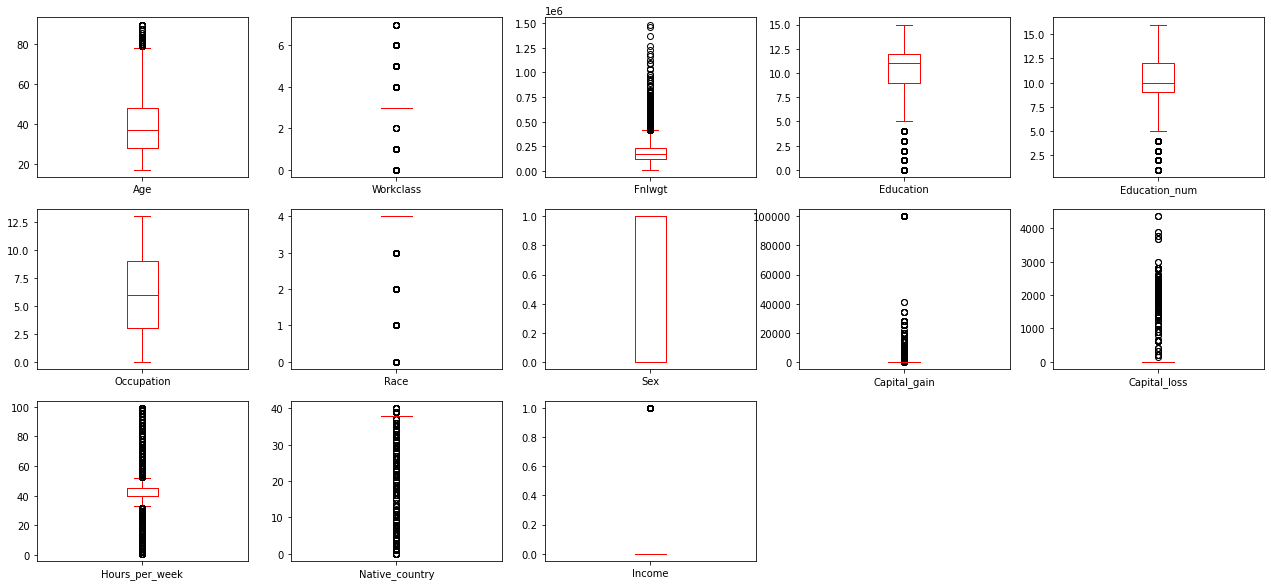

In [32]:
df.plot(kind='box',subplots=True, layout=(3,5),figsize=(22,10), color='red')

It shows that can be many outliers present in all the numerical columns -Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week'

### Removing The Outliers with Zscore method.

In [ ]:
#Removing The Outliers with Zscore method from numerical coulmns.

from scipy.stats import zscore

z=zscore(df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']])
z.head()

In [34]:
threshold=3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32517, 32524, 32530], dtype=int64), array([5, 4, 5, ..., 3, 0, 5], dtype=int64))


we have taken 3 as the threshold value, because anything beyond the z score value of 3 is an outlier.

In [35]:
z.iloc[32530,5]

4.742892901096027

Checking the position of the outlier

In [36]:
DF=df[(z<3).all(axis=1)]
DF.head() 

,Age,Workclass,Fnlwgt,Education,Education_num,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,3,4,1,0,0,13,38,0
1,38,3,215646,11,9,5,4,1,0,0,40,38,0
2,53,3,234721,1,7,5,2,1,0,0,40,38,0
3,28,3,338409,9,13,9,2,0,0,0,40,4,0
4,37,3,284582,12,14,3,4,0,0,0,40,38,0


In [37]:
print('Old_DF:',df.shape)
print('New_DF:',DF.shape)
print('total dropped rows:',df.shape[0]-DF.shape[0])

Old_DF: (32560, 13)
New_DF: (30106, 13)
total dropped rows: 2454


### Percentage data loss

In [38]:
loss_percent=(32560-30106)/32560*100
print(loss_percent,'%')

7.536855036855036 %


The percentage data loss after removal of outliers is 7.53%, which is considerable, as it is not 10% or more.

## Check Skewness

In [39]:
x=DF.drop('Income',axis=1)
y=DF['Income']

In [40]:
x.shape,y.shape

((30106, 12), (30106,))

In [41]:
x.skew()

Age                0.493674
Workclass          0.094330
Fnlwgt             0.633927
Education         -0.926898
Education_num     -0.323823
Occupation         0.002993
Race              -2.432372
Sex               -0.680566
Capital_gain       4.961554
Capital_loss      29.625625
Hours_per_week    -0.406818
Native_country    -4.222549
dtype: float64

These columns shows skewness:
- Fnlwgt             0.633927
- Education         -0.926898
- Race              -2.432372
- Sex               -0.680566
- Capital_gain       4.961554
- Capital_loss      29.625625
- Native_country    -4.222549

In [42]:
from sklearn.preprocessing import power_transform
X=power_transform(x)
X

array([[ 0.92041485,  1.75876462, -1.11662779, ..., -0.04037618,
        -2.17615945,  0.29540449],
       [ 0.12507197, -0.0885932 ,  0.42217841, ..., -0.04037618,
        -0.03042716,  0.29540449],
       [ 1.09466834, -0.0885932 ,  0.60200691, ..., -0.04037618,
        -0.03042716,  0.29540449],
       ...,
       [ 1.36803625, -0.0885932 , -0.23902544, ..., -0.04037618,
        -0.03042716,  0.29540449],
       [-1.3373403 , -0.0885932 ,  0.28399283, ..., -0.04037618,
        -1.69272157,  0.29540449],
       [ 1.0374949 ,  0.82881985,  1.0711773 , ..., -0.04037618,
        -0.03042716,  0.29540449]])

In [43]:
pd.DataFrame(X).skew().sort_values(ascending=False)

9     24.727934
8      3.083582
1      0.225985
10     0.101693
4      0.028001
0     -0.016900
2     -0.034763
5     -0.238445
3     -0.314488
7     -0.680566
6     -2.002449
11    -2.968001
dtype: float64

In [ ]:
from scipy.stats import boxcox

DF['Capital_loss']=boxcox(DF['Capital_loss'],0)  #Removing Skewness with boxcox method.

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

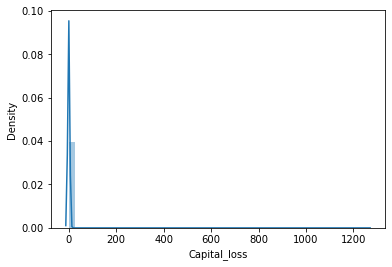

In [45]:
sns.distplot(DF["Capital_loss"])

Skewness is removed

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

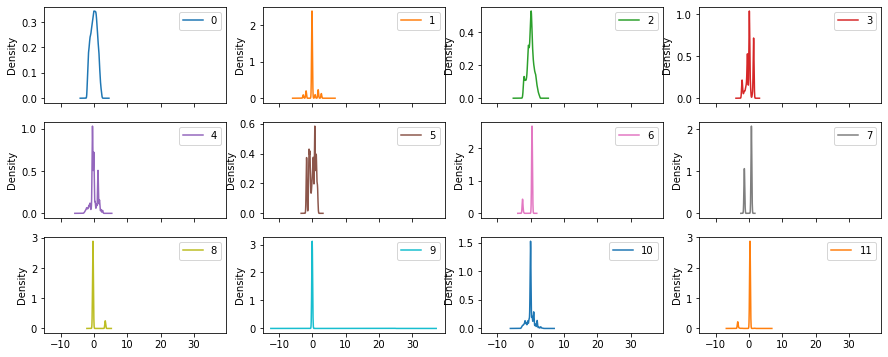

In [46]:
pd.DataFrame(X).plot(kind='kde',subplots=True,layout=(3,4),figsize=(15,6))

#### As seen from the above plot, the skewness is removed.

In [47]:
type(X)

numpy.ndarray

In [48]:
x=pd.DataFrame(X, columns=x.columns)
x.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.920415,1.758765,-1.116628,-0.469592,1.208782,-0.708751,0.41413,0.716039,-0.295915,-0.040376,-2.176159,0.295404
1,0.125072,-0.088593,0.422178,0.094225,-0.448832,-0.177374,0.41413,0.716039,-0.295915,-0.040376,-0.030427,0.295404


### Multicollinearity check :Variance Inflation factor

In [49]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [50]:
x.shape,y.shape, x.shape[1]

((30106, 12), (30106,), 12)

In [51]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [52]:
vif_calc()

    VIF Factor        features
0     1.046421             Age
1     1.008758       Workclass
2     1.015927          Fnlwgt
3     1.094680       Education
4     1.138122   Education_num
5     1.016337      Occupation
6     1.038902            Race
7     1.088666             Sex
8     1.030611    Capital_gain
9     1.001993    Capital_loss
10    1.101609  Hours_per_week
11    1.045736  Native_country


Here, none of the values are above 10.Hence we can say safely that there is no colinearity.

## SMOTE
(As the target column was highly imbalanced)

In [53]:
from imblearn.over_sampling import SMOTE

smt=SMOTE()
xtrain,ytrain=smt.fit_resample(x,y)
xtrain.value_counts()

Age        Workclass  Fnlwgt     Education  Education_num  Occupation  Race     Sex        Capital_gain  Capital_loss  Hours_per_week  Native_country
 0.410312  -0.088593   0.311126   1.380049  -0.053932       0.747923   0.41413   0.716039  -0.295915     -0.040376     -0.030427        0.295404         4
-1.009544  -0.088593   0.229157  -1.780947  -2.737665       0.529007   0.41413  -1.396571  -0.295915     -0.040376     -0.030427       -3.397884         3
-1.702687  -0.088593  -0.397497   1.380049  -0.053932      -1.712617   0.41413  -1.396571  -0.295915     -0.040376     -2.361864        0.295404         2
-1.009544  -0.088593   1.238921  -0.469592   1.208782      -1.003843   0.41413   0.716039  -0.295915     -0.040376     -0.030427       -3.372802         2
-0.907240  -0.088593   1.881703  -0.469592   1.208782      -1.712617   0.41413  -1.396571  -0.295915     -0.040376     -0.030427        0.295404         2
                                                                           

In [54]:
ytrain.value_counts()

0    23437
1    23437
Name: Income, dtype: int64

In [55]:
y=ytrain
x=xtrain

<AxesSubplot:xlabel='Income', ylabel='count'>

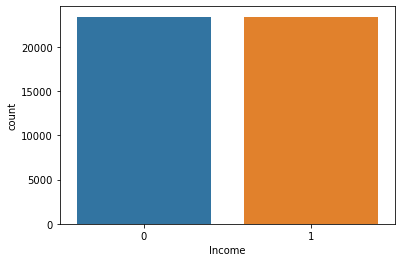

In [56]:
sns.countplot(y)

The target column is balanced now for further learning.

## Scaling The Data using Standard Scaler

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x=x1
x

array([[ 0.81281339,  1.69642549, -1.15288886, ..., -0.03283692,
        -2.41060742,  0.28345076],
       [-0.05526522, -0.0787793 ,  0.43957632, ..., -0.03283692,
        -0.18864318,  0.28345076],
       [ 1.00300272, -0.0787793 ,  0.62567553, ..., -0.03283692,
        -0.18864318,  0.28345076],
       ...,
       [ 0.12338151, -0.0787793 , -0.54424493, ..., -0.03283692,
         0.33478809, -3.54643168],
       [-0.47750967, -1.79257191,  0.26770688, ..., -0.03283692,
         0.79047916,  0.28345076],
       [ 0.72672702, -0.0787793 , -0.28473341, ..., -0.03283692,
         0.31016477,  0.28345076]])

In [58]:
y

0        0
1        0
2        0
3        0
4        0
        ..
46869    1
46870    1
46871    1
46872    1
46873    1
Name: Income, Length: 46874, dtype: int32

# Training of the data

### Finding the best random fit

In [60]:
MaxAcu=0 #Max Accuracy
MaxRS=0 #best random state for which best accuracy is acheived

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.33,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    
    print(f"At random state {i} the Maximum accuracy score is: {accuracy_score(y_test,pred)*100}")   

At random state 1 the Maximum accuracy score is: 76.46946443354773
At random state 2 the Maximum accuracy score is: 76.38030949500096
At random state 3 the Maximum accuracy score is: 76.43125517417054
At random state 4 the Maximum accuracy score is: 76.36438897026045
At random state 5 the Maximum accuracy score is: 76.15742214863403
At random state 6 the Maximum accuracy score is: 76.35802076036427
At random state 7 the Maximum accuracy score is: 76.28160224160987
At random state 8 the Maximum accuracy score is: 76.54906705725021
At random state 9 the Maximum accuracy score is: 76.47901674839203
At random state 10 the Maximum accuracy score is: 76.45991211870343
At random state 11 the Maximum accuracy score is: 76.52996242756161
At random state 12 the Maximum accuracy score is: 76.52041011271731
At random state 13 the Maximum accuracy score is: 76.2179201426479
At random state 14 the Maximum accuracy score is: 76.42807106922244
At random state 15 the Maximum accuracy score is: 76.35802

#### At random state 98 the Maximum accuracy score is:76.73%

Moving on with the train test split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.33,random_state=98)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((15468, 12), (31406, 12), (15468,), (31406,))

### Random Forest Classifier

In [62]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)

85.74794625230847


### K Neighbour Classifier

In [63]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print(accuracy_score (y_test, predkn)*100)

79.370184041266


### Decision Tree Classifier

In [64]:
dtc=DecisionTreeClassifier(criterion='entropy') 
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)

79.87327262306566


### Gradient boosting Classifier

In [65]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc)*100)

83.08921862064574


### AdaBoost Classifier

In [66]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad)*100)

80.92721136088645


#### Random Forest Classifier gives best accuracy score of 85.74% of all the tried algorithmns. But let us check it with the cross validation method

## Cross Validation Method

In [67]:
scr=cross_val_score(lg,x,y,cv=5)
print("Cross validadtion score of Logistic regression Model is", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validadtion score of Random Forest Classifier is", scr.mean())

scr=cross_val_score(kn,x,y,cv=5)
print("Cross validadtion score of KNeighborClassifier is", scr.mean())

scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validadtion score of DecisionTreeClassifier is", scr.mean())

scr=cross_val_score(gbc,x,y,cv=5)
print("Cross validadtion score of GradientBoostingClassifier is", scr.mean())

scr=cross_val_score(ad,x,y,cv=5)
print("Cross validadtion score of AdaBoostClassifier is", scr.mean())

Cross validadtion score of Logistic regression Model is 0.7638776985989617
Cross validadtion score of Random Forest Classifier is 0.8833902453595049
Cross validadtion score of KNeighborClassifier is 0.830183284830382
Cross validadtion score of DecisionTreeClassifier is 0.8268132690420312
Cross validadtion score of GradientBoostingClassifier is 0.8270686887134628
Cross validadtion score of AdaBoostClassifier is 0.8064174212360431


### From the cross validadtion score The Gradient Boost Classifier gives the best fit, where the CV score is 82.70% and the Accuracy score is 83.08%. The difference between these scores is the least from all  the algorithms, hence the Gradient boosting Classifier is the best suited algorithm.

## Hyper parameter tuning of Gradient boosting Classifier

In [68]:
#creating parameters to pass in Grid search
para={'loss':['log_loss', 'deviance', 'exponential'],'max_depth':[3,4,5],
      'learning_rate':[0.1,0.01,1],'n_estimators':[10,50,100], 'criterion':['friedman_mse', 'squared_error', 'mse']}

In [69]:
GCV=GridSearchCV(GradientBoostingClassifier(),para,cv=5)
GCV.fit(x_train,y_train) #fiting the data in the model
GCV.best_params_         #printing the best parameter found by GCV

{'criterion': 'squared_error',
 'learning_rate': 1,
 'loss': 'exponential',
 'max_depth': 3,
 'n_estimators': 100}

In [71]:
#Final Model:
FM=GradientBoostingClassifier(criterion='squared_error', max_depth=3,learning_rate= 1,loss='exponential',n_estimators=100)
FM.fit(x_train,y_train)
predgbc=FM.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,predgbc)*100)
print("Best Accuracy Score for GCV best estimator", FM, "is",accuracy_score(y_test,predgbc)*100)

Accuracy Score: 88.48309240272559
Best Accuracy Score for GCV best estimator GradientBoostingClassifier(criterion='squared_error', learning_rate=1,
                           loss='exponential') is 88.48309240272559


In [72]:
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

[[14224  1475]
 [ 2142 13565]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     15699
           1       0.90      0.86      0.88     15707

    accuracy                           0.88     31406
   macro avg       0.89      0.88      0.88     31406
weighted avg       0.89      0.88      0.88     31406



### AUC ROC Scores:

In [77]:
from sklearn.metrics import roc_auc_score

#Logistic Regression
print("Logistic Regression:" ,roc_auc_score(y_test,pred))
#Random Forest Classifier
print("Random Forest Classifier:",roc_auc_score(y_test,predrf))
#KNeighbour Classifier
print("KNeighbour Classifier:",roc_auc_score(y_test,predkn))
# Decision Tree Classifier
print("Decision Tree Classifier:",roc_auc_score(y_test,preddtc))
#GB Classifier
print("GB Classifier:",roc_auc_score(y_test,predgbc))
# AdaBoostCalssifier
print("AdaBoost Classifier:",roc_auc_score(y_test,predad))

Logistic Regression: 0.49967723397419883
Random Forest Classifier: 0.8574793883888574
KNeighbour Classifier: 0.7936837480089407
Decision Tree Classifier: 0.7987324941789761
GB Classifier: 0.8848363264712593
AdaBoost Classifier: 0.8092701384147523


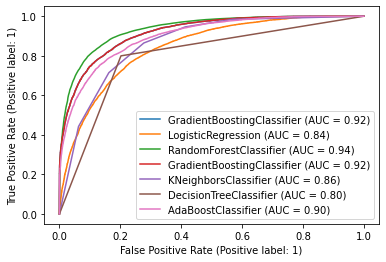

In [78]:
from sklearn.metrics import plot_roc_curve

graph = plot_roc_curve(gbc,x_test,y_test)
model= [lg,rf,gbc,kn,dtc,ad]

for i in model:
    plot_roc_curve(i,x_test,y_test, ax=graph.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

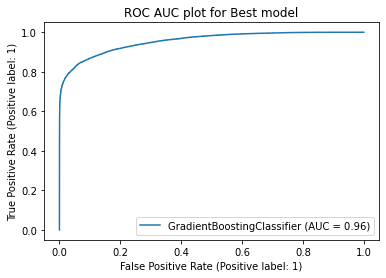

In [80]:
plot_roc_curve(FM,x_test,y_test)
plt.title("ROC AUC plot for Best model")
plt.show()

This shows that Area Under the Curve for Gradient boosting classifier is 96%

## Saving the best model : Gradient boosting Classifier

In [73]:
#saving the model 
import joblib
joblib.dump(FM,'CensusIncome.pkl')

['CensusIncome.pkl']

In [74]:
loadmodel = joblib.load('CensusIncome.pkl')

In [75]:
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
31401,0,0
31402,1,1
31403,0,0
31404,0,0


### Conclusion: 
- Best Accuracy Score for GCV best estimator GradientBoostingClassifier(criterion='squared_error', learning_rate=1,loss='exponential') is 88%
- This means that the model works well 88% and can be used to predict the income of the people above 50K.

## Thank you.